## Modelo de Árvore de Decisão

Nesse arquivo vamos trabalhar o modelo de árvore de decisão, se baseando nos dados vistos na pasta 'data'

---

### Importando bibliotecas

In [20]:
import pandas as pd 
from sklearn import tree
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

### Criando dataset

In [21]:
df = pd.read_csv("./data/heart_attack_prediction_dataset.csv", sep=',')
df['systolic'] = df['Blood Pressure'].str.split('/').str[0]
df['diastolic'] = df['Blood Pressure'].str.split('/').str[1]
df = df.drop(columns=['Patient ID', 'Blood Pressure', 'Country', 'Continent', 'Hemisphere'])
df

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,systolic,diastolic
0,67,1,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,...,8,10.806373,235420,19.655895,67,7,7,0,94,76
8759,28,0,120,73,1,0,0,1,0,16.558426,...,8,3.833038,217881,23.993866,617,4,9,0,157,102
8760,47,1,250,105,0,1,1,1,1,3.148438,...,5,2.375214,36998,35.406146,527,4,4,1,161,75
8761,36,1,178,60,1,0,1,0,0,3.789950,...,5,0.029104,209943,27.294020,114,2,8,0,119,67


### Preparando dados para o modelo

In [22]:
x = df.drop(columns=['Heart Attack Risk'])
y = df['Heart Attack Risk']

x.head
y.head

<bound method NDFrame.head of 0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: Heart Attack Risk, Length: 8763, dtype: int64>

### Separação dos grupos de teste e treino 
A fatia separada para o treino do modelo equivale a 25% da base de dados

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### Criação e execução do modelo de árvore de decisão

In [24]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

### Analise dos resultados

##### Matriz de confusão

In [25]:
print('\n Matriz de confusão\n', pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'], margins = True, margins_name="Todos"))



 Matriz de confusão
 Predito     0    1  Todos
Real                     
0         882  522   1404
1         508  279    787
Todos    1390  801   2191


##### Métricas

In [26]:
accur = metrics.accuracy_score(y_test, predictions)
print(f"Acurácia: {accur:.4f}")
precisao = metrics.precision_score(y_test, predictions)
print(f'Precisão: {precisao:.4f}')
revocacao = metrics.recall_score(y_test, predictions)
print(f'Revocação: {revocacao:.4f}')
f1 = metrics.f1_score(y_test, predictions)
print(f'F1-Score: {f1:.4f}')

Acurácia: 0.5299
Precisão: 0.3483
Revocação: 0.3545
F1-Score: 0.3514


##### Aplicando a curva ROC ao resultados

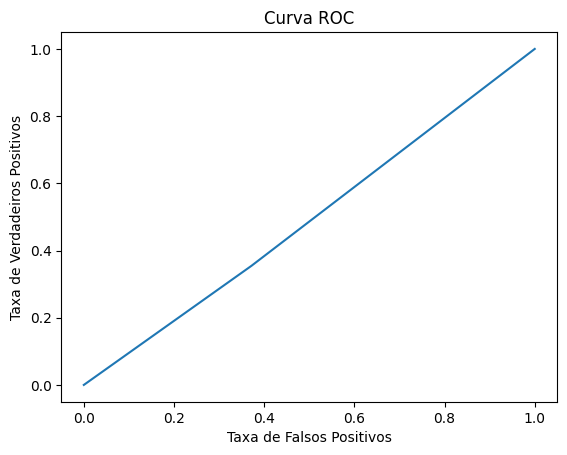

Área sob a Curva ROC (ROC AUC): 0.49135796435669366


In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)

plt.plot(fpr, tpr)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

roc_auc = metrics.roc_auc_score(y_test, predictions)
print(f'Área sob a Curva ROC (ROC AUC): {roc_auc}')